**Matric no : 1824208**

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
from IPython.display import Image

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
path = "/content/gdrive/MyDrive/mv/"

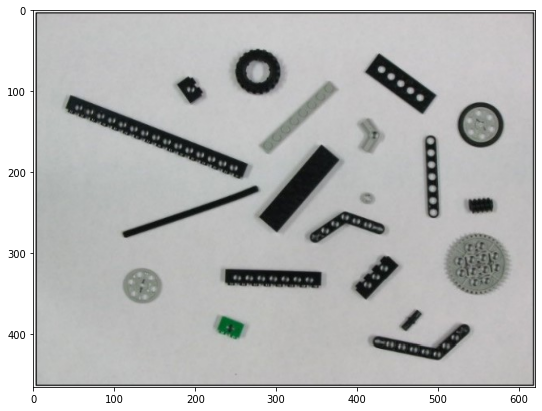

In [21]:
image = cv2.imread(path+"lego1.jpg", cv2.IMREAD_COLOR)

# Display the original image
plt.imshow(image[:,:,::-1])

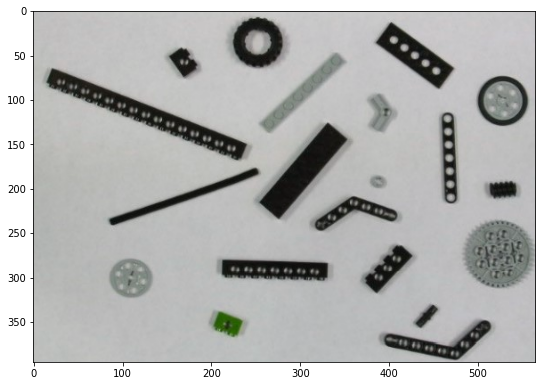

In [68]:
#croping image
cropped_image = image[40:435, 25:590]
plt.imshow(cropped_image)

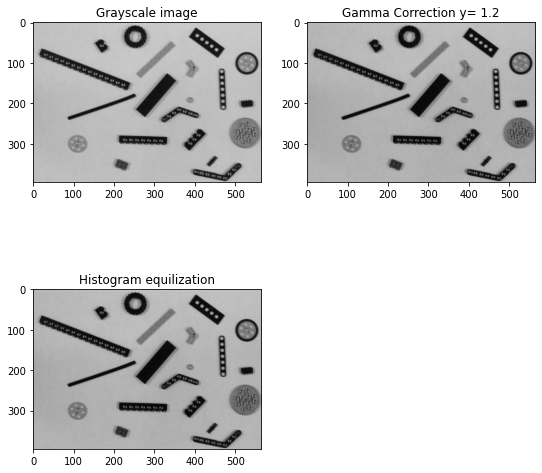

In [69]:
# Convert image in grayscale
gray_im = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
plt.subplot(221)
plt.title('Grayscale image')
plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)

# Contrast adjusting with gamma correction y = 1.2

gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
plt.subplot(222)
plt.title('Gamma Correction y= 1.2')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)

# Contrast adjusting with histogramm equalization
gray_equ = cv2.equalizeHist(gray_im)
plt.subplot(223)
plt.title('Histogram equilization')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)

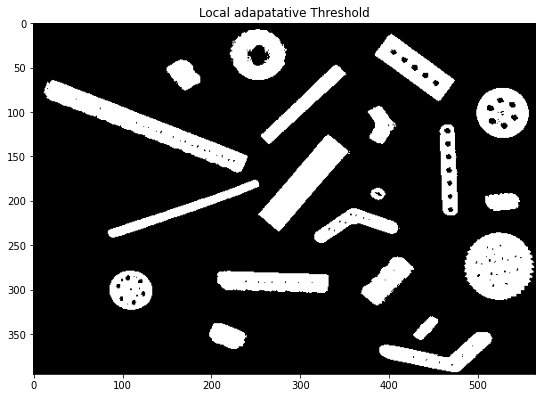

In [70]:
# Local adaptative threshold to binarize the image

thresh = cv2.adaptiveThreshold(gray_correct, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 19)
thresh = cv2.bitwise_not(thresh)

plt.title('Local adapatative Threshold')
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)

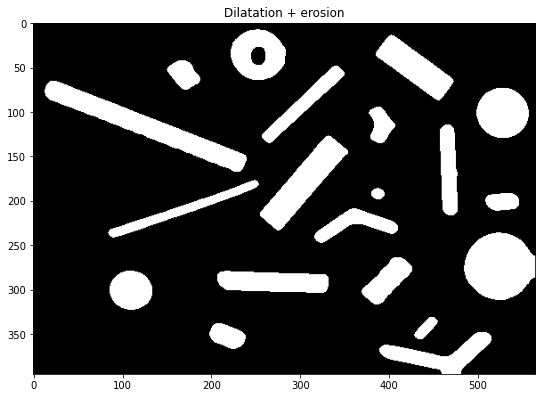

In [74]:
# Dilatation and erosion
kernel = np.ones((9,9), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
img_erode = cv2.erode(img_dilation,kernel, iterations=1)

# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)

plt.title('Dilatation + erosion')
plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)

objects number is: 20


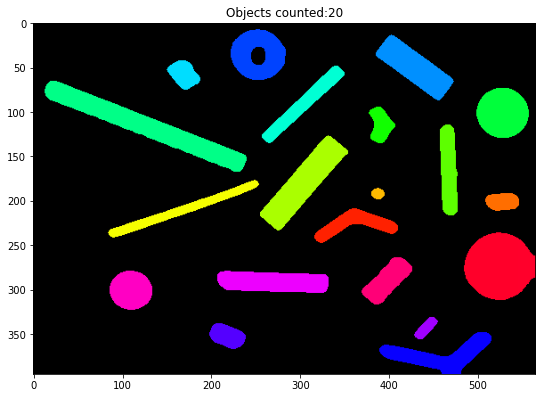

In [75]:
# Labeling
ret, labels = cv2.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0


plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()

Working flowchart

---

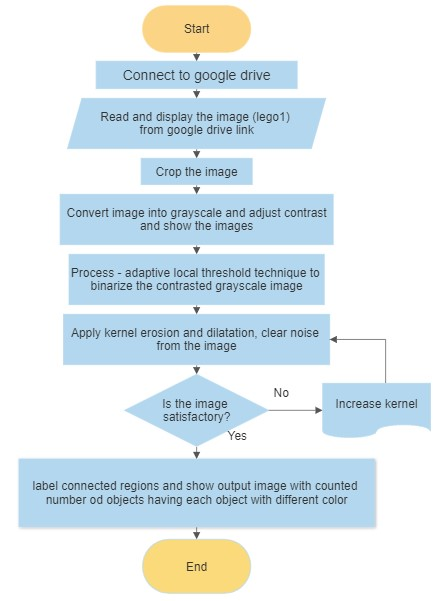

Description : The image "lego1.jpg" is saved at google drive. By connecting with google drive, the image is read and shown in output.The image is cropped to avoid unwanted background. To binarize the image, at first the image is converted to grayscale in order to have only one channel image. Even without converting, there are difference between these images characteristics. The first image contains small objects, and some have the same pixels values with the background. This aspect can cause the egdes detecting problem. So to prevent this, the code for image contrast adjustment is applied by the method of Gamma correction and Histogram equalization. The grayscale image, gamma correction and histogram equalization image are shown.
From the output, it can be seen that Gamma correction gives better result, so i am going to use this.
Then adaptive local threshold technique is used to binarize our grayscale image (contrast corrected grayscale image).
After the thresholding, there many connected regions, this is not suitable to count objects in the image cause the counting of objects is due to number of connected regions, so in addition, have to apply some other techniques before count number of objects in the image.
Now with kernel, erosion and dilatation techniques are applied to connected nearest regions in order to have on region per object.
As a result, there is one object per connected region, so it is easy to count number of objects in the image. 
At last, labelling is used to label each object with different color as well as to count the objects.
The final output image shows hoy many objects in the image with each object having different color.
